<a href="https://colab.research.google.com/github/Mighty2Skiddie/Perceptron_model-deep-learning/blob/main/Perceptron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [ ]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
data['Class']=breast_cancer.target

In [ ]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
class Perceptron:

  def __init__(self):
      self.w = None
      self.b = None

  def model(self, x):
      return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
      Y = []
      for x in X:
        result = self.model(x)
        Y.append(result)
      return np.array(Y)

  def fit(self, X, Y, epochs = 1,lr=1):
      self.w = np.ones(X.shape[1])
      self.b = 0

      accuracy = {}
      max_accuracy = 0

      for i in range(epochs):

          for x, y in zip(X, Y):
            y_pred = self.model(x)
            if y == 1 and y_pred == 0:
              self.w = self.w + lr*x
              self.b = self.b + lr*1
            elif y == 0 and y_pred == 1:
              self.w = self.w - lr*x
              self.b = self.b - lr*1
          accuracy[i] = accuracy_score(self.predict(X), Y)
          if (accuracy[i] > max_accuracy):
            max_accuracy = accuracy[i]
            print(accuracy[i])
            chkptw = self.w
            chekptb = self.b
      self.w = chkptw
      self.b = chekptb
      print(self.w, self.b)
      print(max_accuracy)

      plt.plot(accuracy.values())
      plt.ylim([0, 1])
      plt.show()



In [ ]:
perceptron=Perceptron()

In [ ]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,stratify=Y, random_state=42)

In [ ]:
X_train=X_train.values
X_test=X_test.values


0.90234375
0.90625
0.908203125
[ 2.94554     3.27152    12.21782     5.7608      1.0152928   0.98740442
  0.9616462   0.98281975  1.0272959   1.01322789  0.9720694   1.0891297
  0.6419588  -6.599529    1.00066971  0.99604225  0.99461997  0.99855432
  1.0008976   0.99998681  2.983552    3.89997    11.94656    -7.7478
  1.01956536  0.95688936  0.92681417  0.9786431   1.0352946   1.01172032] 0.25300000000000017
0.908203125


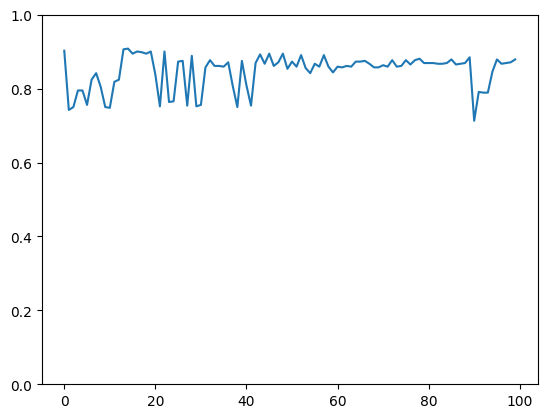

In [ ]:
perceptron.fit(X_train, Y_train,100,0.001)

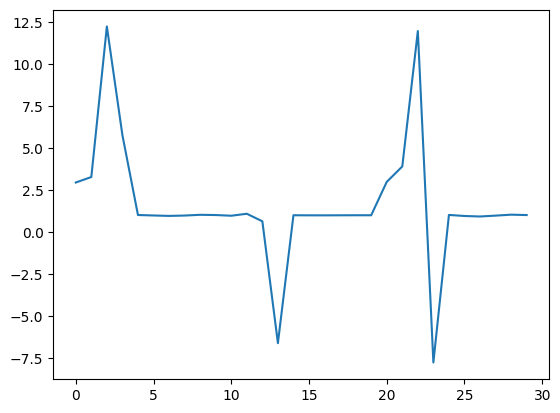

In [ ]:
plt.plot(perceptron.w)
plt.show()